# Create a Machine Learning model using various Classification Models to predict rainfall.


# Rainfall Prediction Project

--------------------------------------------------------------------------------Overview---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This project aims to forecast rainfall in Sydney by utilizing past weather information. To construct and assess our model, we will make use of a variety of classification methods, such as Gradient Boosting, Random Forests, and Decision Trees. To find the optimal model, we will use accuracy and confusion matrices to compare the performance of these models.

-------------------------------------------------------------------------------Data Description------------------------------------------------------------------------------

The dataset contains the following columns:

- Date: The date of observation

- Location: The common name of the location of the weather station

- MinTemp: The minimum temperature in degrees Celsius

- MaxTemp: The maximum temperature in degrees Celsius

- Rainfall: The amount of rainfall recorded for the day in mm

- Evaporation: The Class A pan evaporation (mm) in the 24 hours to 9am

- Sunshine: The number of hours of bright sunshine in the day

- Humidity 9am: Humidity (percent) at 9am

- Humidity3pm: Humidity (percent) at 3pm

- Pressure 9am: Atmospheric pressure (hPa) reduced to mean sea level at 9am

- Pressure 3pm: Atmospheric pressure (hPa) reduced to mean sea level at 3pm

- Cloud 9am: Fraction of sky obscured by clouds at 9am (in oktas)

- Cloud3pm: Fraction of sky obscured by clouds at 3pm (in oktas)

- Temp 9am: Temperature (degrees C) at 9am

- Temp3pm: Temperature (degrees C) at 3pm

- RainToday: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

- RainTomorrow: Boolean indicating if it rained the next day

In [ ]:
#Importing libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#load dataset
data=pd.read_excel('C:/Users/DELL/Downloads/sydney_rain prediction.xlsx')

In [107]:
# Display the first few rows
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Overview

In [108]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [5]:
data.shape

(3337, 17)

In [85]:
data.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337.0,3337.0,3334.000000,3335.000000,3331.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,0.0,0.0
mean,0.0,0.0,14.865057,23.002339,3.330231,5.181510,7.184747,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054,NaN,NaN
std,0.0,0.0,4.553641,4.494638,9.895172,2.756505,3.802525,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163,NaN,NaN
min,0.0,0.0,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,NaN,NaN
25%,0.0,0.0,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,NaN,NaN
50%,0.0,0.0,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,NaN,NaN
75%,0.0,0.0,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,NaN,NaN
max,0.0,0.0,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,NaN,NaN


In [6]:
# Check for missing values
data.isna().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Preprocessing

In [ ]:
# Handle missing values, convert categorical variables, and prepare the data for modeling.

In [ ]:
# Data Cleaning

In [109]:
# Drop rows with missing target variable
data = data.dropna(subset=['RainTomorrow'])


In [110]:
# Fill missing values for other columns
data = data.fillna({
    'Evaporation': data['Evaporation'].median(),
    'Sunshine': data['Sunshine'].median(),
    'Humidity9am': data['Humidity9am'].median(),
    'Humidity3pm': data['Humidity3pm'].median(),
    'Pressure9am': data['Pressure9am'].median(),
    'Pressure3pm': data['Pressure3pm'].median(),
    'Cloud9am': data['Cloud9am'].median(),
    'Cloud3pm': data['Cloud3pm'].median(),
    'Temp9am': data['Temp9am'].median(),
    'Temp3pm': data['Temp3pm'].median()
})

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data visulization

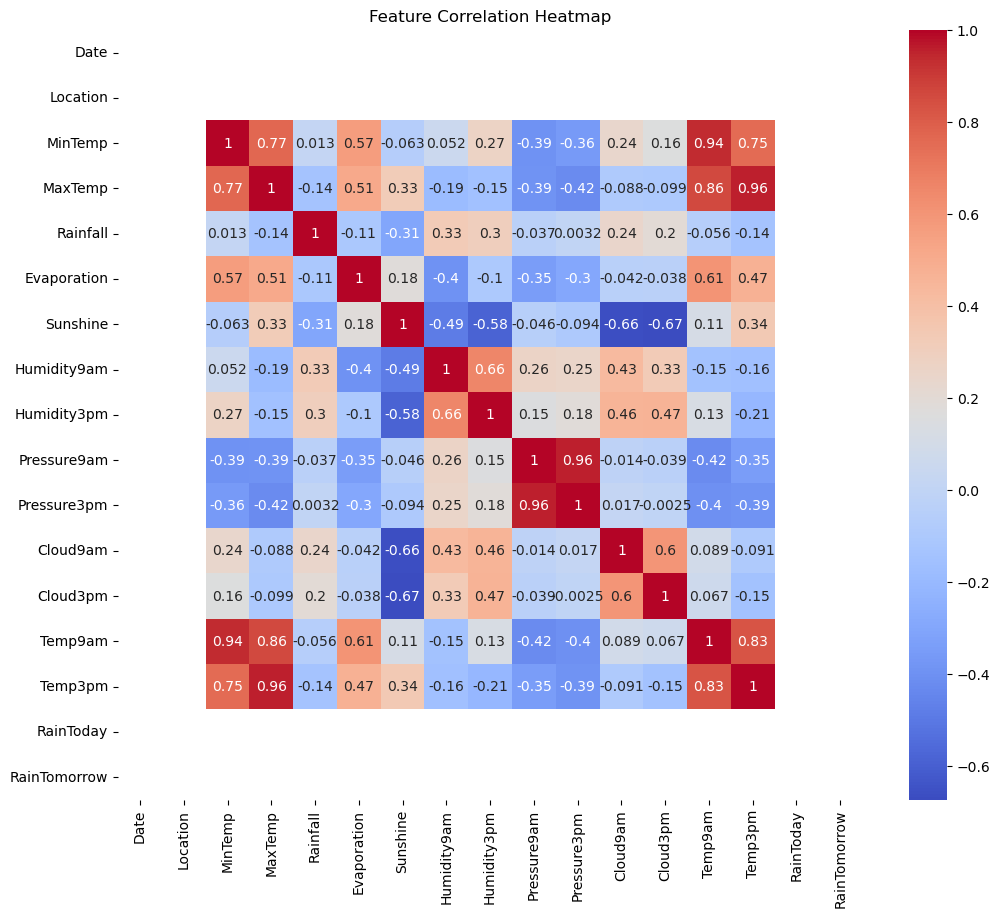

In [91]:
# Heatmap for correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

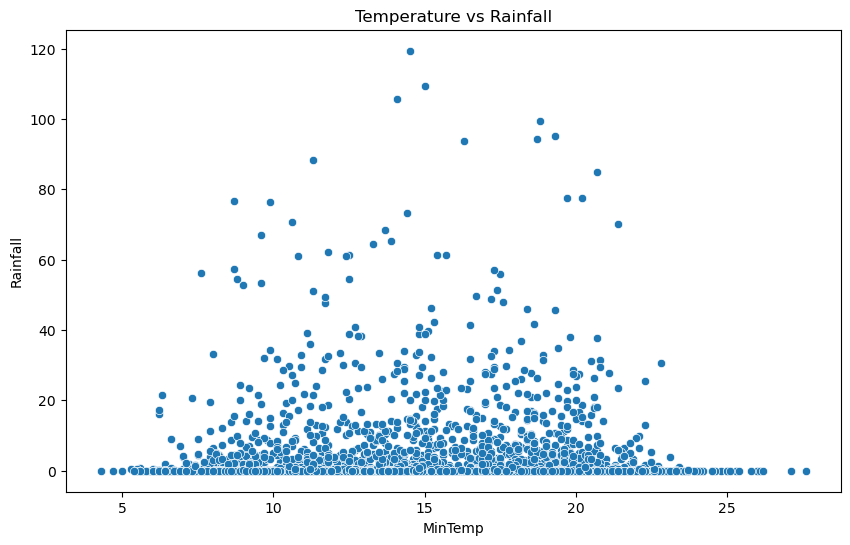

In [92]:
# Scatter plot for temperature and rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinTemp', y='Rainfall', data=data)
plt.title('Temperature vs Rainfall')
plt.show()

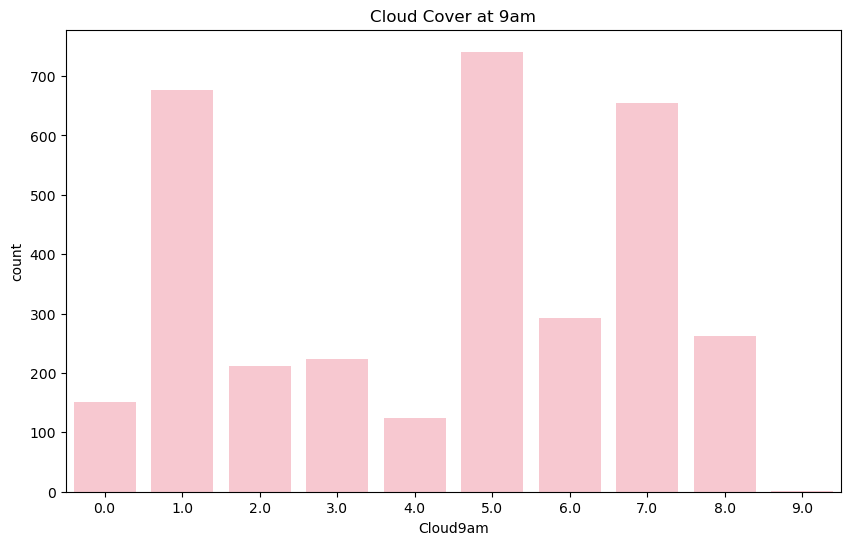

In [94]:
# Bar chart for cloud cover
plt.figure(figsize=(10, 6))
sns.countplot(x='Cloud9am', data=data,color='pink')
plt.title('Cloud Cover at 9am')
plt.show()


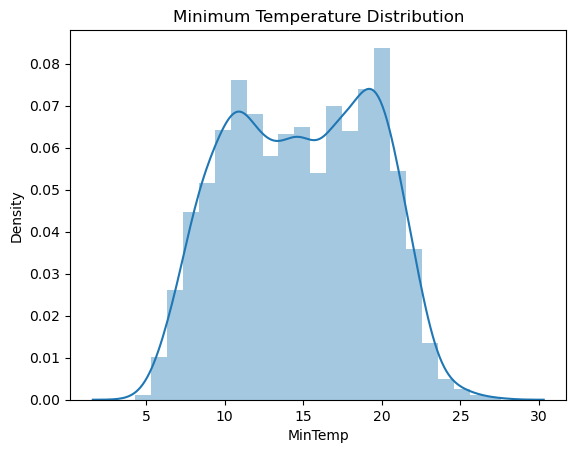

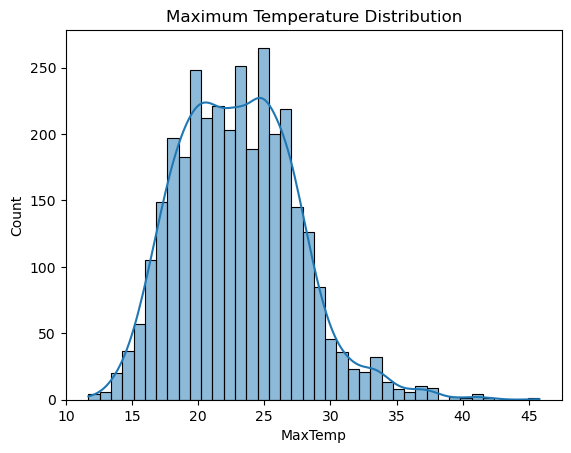

In [99]:
# Distribution plots for numeric features
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

sns.distplot(data['MinTemp'])
plt.title('Minimum Temperature Distribution')
plt.show()


sns.histplot(data['MaxTemp'], kde=True)
plt.title('Maximum Temperature Distribution')
plt.show()




------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# -Build and Evaluate Classification Models

In [140]:
# Define features and target variable
X = data.drop('RainTomorrow', axis=1)  # Remove the target variable
y = data['RainTomorrow']  # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
# Convert date columns to numeric
date_columns = ['Date']  # Replace with your actual date column names
for col in date_columns:
    data[col] = pd.to_datetime(data[col]).apply(lambda x: x.timestamp())



In [163]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# HistGradientBoosting Classifier

In [212]:
#HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [213]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [200]:
print(len(X_train))  # Output: 1613
print(len(y_train))  # Output: 2335

1613
1613


In [185]:
X_train, y_train = X_train[:len(y_train)], y_train[:len(X_train)]

In [214]:

from sklearn.ensemble import HistGradientBoostingClassifier
# Train the  HistGradientBoostingClassifier  model
gb_model = HistGradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


HistGradientBoostingClassifier(random_state=42)

In [208]:
y_test = y_test[:323]

In [207]:
print(len(y_test)) 
print(len(gb_predictions))

323
1002


In [215]:
gb_predictions = gb_model.predict(X_test)

In [216]:
# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
print(f"HistGradientBoostingClassifier accuracy: {gb_accuracy}")
print("HistGradientBoostingClassifier Confusion Matrix:")
print(gb_confusion_matrix)


HistGradientBoostingClassifier accuracy: 0.739938080495356
HistGradientBoostingClassifier Confusion Matrix:
[[231  10]
 [ 74   8]]


# Decision tree

In [217]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



In [218]:
# Train the  DecisionTreeClassifier  model
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier(random_state=42)
dc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [166]:
# Make predictions
dc_predictions = dc_model.predict(X_test)

In [170]:
X_train, y_train = X_train[:len(y_train)], y_train[:len(X_train)]

In [219]:
# Evaluate the model
dc_accuracy = accuracy_score(y_test, dc_predictions)
dc_confusion_matrix = confusion_matrix(y_test, dc_predictions)

print(f"DecisionTreeClassifier accuracy: {dc_accuracy}")
print("DecisionTreeClassifier Confusion Matrix:")
print(dc_confusion_matrix)

DecisionTreeClassifier accuracy: 0.6037151702786377
DecisionTreeClassifier Confusion Matrix:
[[176  65]
 [ 63  19]]


# RandomForest Classifier

In [172]:
#RandomForest
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix


In [173]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [174]:
# Train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [175]:
# Make predictions
rf_predictions = rf_model.predict(X_test_imputed)


In [180]:
print(len(y_test)) 
print(len(rf_predictions))  


323
323


In [178]:
y_test = y_test[:len(rf_predictions)]

In [220]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print(f"RandomForestClassifier accuracy: {rf_accuracy}")
print("RandomForestClassifier Confusion Matrix:")
print(rf_confusion_matrix)

RandomForestClassifier accuracy: 0.7368421052631579
RandomForestClassifier Confusion Matrix:
[[238   3]
 [ 82   0]]


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Visualizations
# Create confusion matrix visualizations for each model.


In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

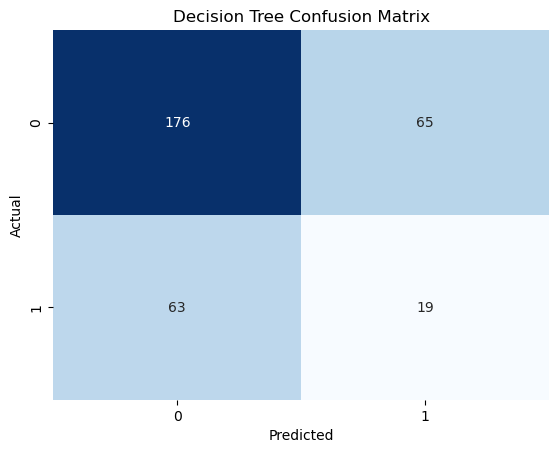

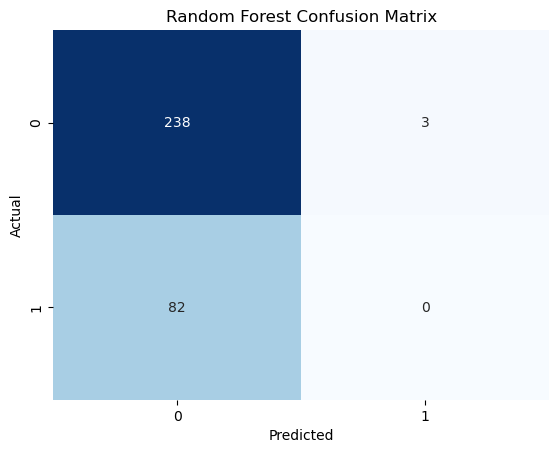

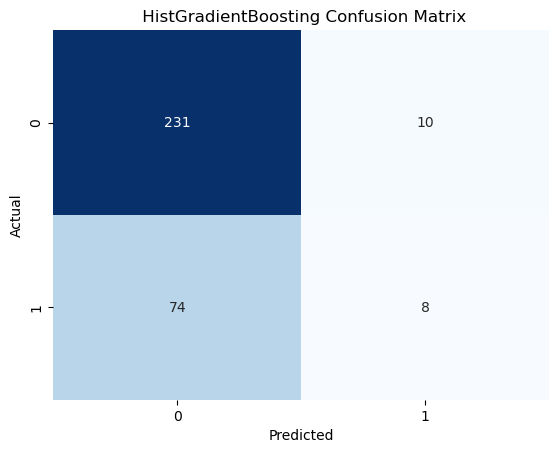

In [222]:
# Plot confusion matrices
plot_confusion_matrix(dc_confusion_matrix, 'Decision Tree Confusion Matrix') 
plot_confusion_matrix(rf_confusion_matrix, 'Random Forest Confusion Matrix')
plot_confusion_matrix(gb_confusion_matrix, ' HistGradientBoosting Confusion Matrix')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Model Comparison

1.Decision Tree Classifier

  - Accuracy:  0.6037151702786377

  - Confusion Matrix:[[176  65] [ 63  19]]


2.Random Forest Classifier

  - Accuracy: 0.7368421052631579 

  - Confusion Matrix:[[238   3] [ 82   0]] 

3.HistGradientBoosting Classifier

  - Accuracy0.739938080495356: 

  - ConfusioMatrix:[[231  10] [ 74   8]]x:

Based on the evaluations, the model with the highest accuracy is HistGradientBoosting Classifier . 
This model performs better due to its ability to handle complex interactions and patterns in the data.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Answers to Questions

1.Your views about the problem statement?

The problem statement makes sense and is useful. Accurate rainfall prediction is useful for many things, from daily planning to farming decisions. 
Effectively managing a variety of weather characteristics and their interactions is the problem.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2.What will be your approach to solving this task?

In order to accommodate missing values and categorical variables, my method preprocesses the data. 
Next, I'll put a variety of categorization models into practice, such as HistGradientBoosting Classifier, Random Forests, and Decision Trees.
Accuracy and confusion matrices will be used to train and assess the models.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
3.What were the available ML model options you had to perform this task?
    
The ML model options that are accessible are as follows: 

- Decision Tree Classifier: a simple model that divides the data according to feature values.

- Random Forest Classifier: An ensemble technique that increases accuracy by combining several decision trees.

- HistGradientBoosting Classifier: An ensemble technique that creates models in a stepwise manner in order to fix mistakes in earlier models.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
4.Which model’s performance is best and what could be the possible reason for that?

HistGradientBoosting Classifier the model that performs the best. 
The fact that this model can identify intricate patterns and interactions in the data probably makes it perform better than the others.
Because ensemble techniques like Random Forest and Decision Tree Classifier incorporate the advantages of numerous models, they typically yield better results.

------------------------------------------------------------------------------------------------------------------------------------------------------------------
5.What steps can you take to improve this selected model’s performance even further?

To enhance the model's functionality even further, take into account:

- Hyperparameter Tuning: Use methods such as Grid Search or Random Search to fine-tune the model's hyperparameters.

- Feature Engineering: To better identify trends in the data, add new features or modify current ones.
    
- Cross-Validation: To make sure the model adapts well to new data, apply k-fold cross-validation.
    
- Additional Data: To improve the model's capacity to learn from a variety of examples, include additional data, if available.




